# Walmart Analysis Report

#### By: Joann Balraj

#### May 19, 2022

### Project Goals:
 - Find what causes the store to do well or not (what makes Walmart busy). What makes Walmart to do well? What causes Walmart to have less business?
 - Document my process so that it can be presented to a non-data scientist, as well as read later like a report.

### Project Description:
One of the leading retail stores in the US, Walmart. I would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

In [1]:
# Import necessary libraries, etc.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore') 

from datetime import datetime

In [2]:
# Read local .csv downloaded from kaggle.com and store data in a dataframe
df = pd.read_csv('walmart_cleaned.csv')
df.head()

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,0,1,2010-02-05,0,1.0,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
1,1,1,2010-02-05,0,26.0,11737.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
2,2,1,2010-02-05,0,17.0,13223.76,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
3,3,1,2010-02-05,0,45.0,37.44,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315
4,4,1,2010-02-05,0,28.0,1085.29,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,3,151315


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    421570 non-null  int64  
 1   Store         421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   IsHoliday     421570 non-null  int64  
 4   Dept          421570 non-null  float64
 5   Weekly_Sales  421570 non-null  float64
 6   Temperature   421570 non-null  float64
 7   Fuel_Price    421570 non-null  float64
 8   MarkDown1     421570 non-null  float64
 9   MarkDown2     421570 non-null  float64
 10  MarkDown3     421570 non-null  float64
 11  MarkDown4     421570 non-null  float64
 12  MarkDown5     421570 non-null  float64
 13  CPI           421570 non-null  float64
 14  Unemployment  421570 non-null  float64
 15  Type          421570 non-null  int64  
 16  Size          421570 non-null  int64  
dtypes: float64(11), int64(5), object(1)
memory usage

In [4]:
pd.DataFrame(df.dtypes, columns=['Type']).T

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Type,int64,int64,object,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64


## Data Preprocessing

In [5]:
# Converting to dateime where needed

df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Week'] = pd.to_datetime(df['Date']).dt.week
df['DayOfTheWeek'] = df['Date'].dt.dayofweek
df['Day'] = pd.to_datetime(df['Date']).dt.day

In [6]:
# Checking that the Date column Dtype is in fact changed
pd.DataFrame(df.dtypes, columns=['Type']).T

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,...,MarkDown5,CPI,Unemployment,Type,Size,Year,Month,Week,DayOfTheWeek,Day
Type,int64,int64,datetime64[ns],int64,float64,float64,float64,float64,float64,float64,...,float64,float64,float64,int64,int64,int64,int64,int64,int64,int64


In [7]:
# Checking null values
df.isna().sum()

Unnamed: 0      0
Store           0
Date            0
IsHoliday       0
Dept            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
Type            0
Size            0
Year            0
Month           0
Week            0
DayOfTheWeek    0
Day             0
dtype: int64

Dataset description was correct - there are in fact no nulls

____


### Do we really need the markdown columns?

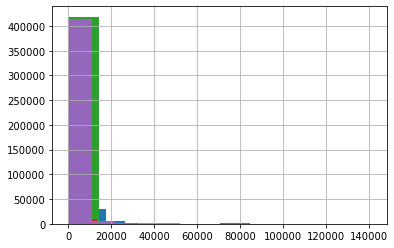

In [8]:
df['MarkDown1'].hist(), df['MarkDown2'].hist(), df['MarkDown3'].hist(), df['MarkDown4'].hist(), df['MarkDown5'].hist();

Above, all of the 5 markdown columns are plotted. Seeing as the differences between the 5 are barely noticeable, I will go ahead and drop these columns.

In [9]:
df = df.drop(columns=['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5'])

____

## How do holidays affects sales?

In [10]:
holiday = df[df['IsHoliday'] == 1]
not_holiday = df[df['IsHoliday'] == 0]

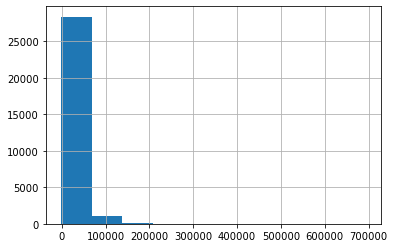

In [16]:
holiday.Weekly_Sales.hist();

In [12]:
# f, ax = plt.subplots(figsize=(10, 7))
# sns.countplot(y="Weekly_Sales", data=df, color="c");

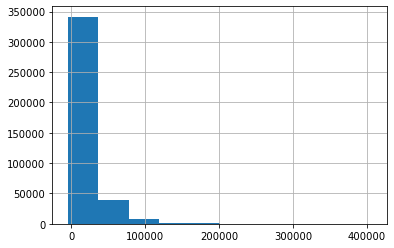

In [17]:
not_holiday.Weekly_Sales.hist();

Sales appear to be higher when it is not a holiday. 
 - Could this be due to people shopping before or after a holiday? (maybe discounts, store closed, need items like presents before date, etc.)
 - Or could this be due to different sample sizes?

In [14]:
not_holiday.Weekly_Sales.count()

391909

In [15]:
holiday.Weekly_Sales.count()

29661

____

### How do weekly sales vary by month?

In [26]:
January = df[df['Month']==1]
February = df[df['Month']==2]

,Unnamed: 0,Store,Date,IsHoliday,Dept,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,Type,Size,Year,Month,Week,DayOfTheWeek,Day
3443,3443,1,2011-01-07,0,98.0,9419.13,48.27,2.976,211.404742,7.742,3,151315,2011,1,1,4,7
3444,3444,1,2011-01-07,0,32.0,5276.25,48.27,2.976,211.404742,7.742,3,151315,2011,1,1,4,7
3445,3445,1,2011-01-07,0,18.0,5180.76,48.27,2.976,211.404742,7.742,3,151315,2011,1,1,4,7
3446,3446,1,2011-01-07,0,7.0,17516.16,48.27,2.976,211.404742,7.742,3,151315,2011,1,1,4,7
3447,3447,1,2011-01-07,0,5.0,22699.69,48.27,2.976,211.404742,7.742,3,151315,2011,1,1,4,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418931,420647,45,2012-01-27,0,5.0,11479.55,37.93,3.567,189.516851,8.424,2,118221,2012,1,4,4,27
418932,420648,45,2012-01-27,0,52.0,1420.35,37.93,3.567,189.516851,8.424,2,118221,2012,1,4,4,27
418933,420649,45,2012-01-27,0,18.0,1523.52,37.93,3.567,189.516851,8.424,2,118221,2012,1,4,4,27
418934,420650,45,2012-01-27,0,11.0,9547.76,37.93,3.567,189.516851,8.424,2,118221,2012,1,4,4,27
